In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

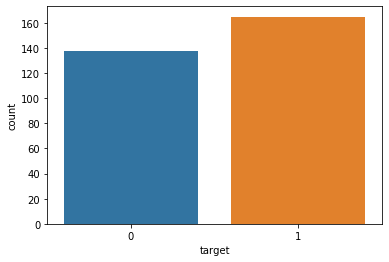

In [4]:
sns.countplot(heart["target"])

In [8]:
columns = heart.columns
columns = list(columns)
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [10]:
for i in columns:
    print(len(heart[i].unique()))

41
2
4
49
152
2
3
91
2
40
3
5
4
2


In [11]:
heart.shape

(303, 14)

In [14]:
from sklearn.model_selection import train_test_split

X = heart.drop(columns=["target"])
Y = heart["target"]

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier(max_depth=4, random_state=42)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

heartPredict = DTree.predict(X_test)

classificationReport = (classification_report(y_test, heartPredict,output_dict=True))
classificationReport = pd.DataFrame(classificationReport).transpose()
classificationReport



,precision,recall,f1-score,support
0,0.653846,0.829268,0.731183,41.000000
1,0.820513,0.640000,0.719101,50.000000
accuracy,0.725275,0.725275,0.725275,0.725275
macro avg,0.737179,0.734634,0.725142,91.000000
weighted avg,0.745421,0.725275,0.724545,91.000000


In [29]:
print(confusion_matrix(y_test, heartPredict))

[[34  7]
 [18 32]]


In [30]:
print(accuracy_score(y_test, heartPredict))

0.7252747252747253


In [31]:
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(max_depth=4, random_state=42)
DTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [34]:
heartPredict = DTree.predict(X_test)

In [39]:
DTree.score(X_train,y_train)

0.7392596243409582